<a href="https://colab.research.google.com/github/debsa2000/MajorProject1_EEDcurriculum/blob/main/EEDProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis

## Importing Dataset

In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal'

In [10]:
%cd /content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal

/content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal


In [11]:
!ls

 EEDProject.ipynb
'Literature Review papers'
"Madan sir's inputs.gdoc"
'Progress report-2: Data Preprocessing and Cleaning.gdoc'
'Progress Report-3.gdoc'
'Project Abstract.gdoc'
 sentiment140dataset.csv
'Week1 Progress Report: Literature Review Survey.gdoc'


In [12]:
import pandas as pd

#reading the data
df = pd.read_csv("/content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal/sentiment140dataset.csv",encoding="ISO-8859-1", header= None)

In [13]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## Naming Columns

In [14]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Dealing With Missing Values

In [15]:
df.isna().sum()

sentiment    0
id           0
date         0
query        0
user_id      0
text         0
dtype: int64

It can be seen that there are no missing values.

## Removing redundant columns

Since only the tweet text is going to be used for classifying sentiments, the rest of the useless columns are removed:

In [16]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [17]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## Labelling classes

In [18]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))

In [19]:
df

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


## Data Skewness Visualization


Text(0.5, 1.0, 'Sentiment Data Distribution')

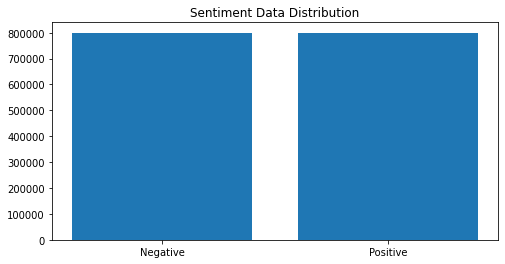

In [20]:
val_count = df.sentiment.value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

It's a very good dataset without any skewness

# **Data Preprocessing**


In [21]:
df.head(15)

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
5,Negative,@Kwesidei not the whole crew
6,Negative,Need a hug
7,Negative,@LOLTrish hey long time no see! Yes.. Rains a...
8,Negative,@Tatiana_K nope they didn't have it
9,Negative,@twittera que me muera ?


### Removing URLs (http://... or https://...), hashtags, mentions(@profilename) and old style retweet text "RT"

In [22]:
import re

def remove_junk(input_text):
  url_removed_text= re.sub(r'http\S+','',input_text)
  hashtag_removed_text= re.sub(r'@[A-Za-z0-9_]+', '',url_removed_text)
  tag_removed_text= re.sub(r'#[A-Za-z0-9_]+', '',hashtag_removed_text)
  cleaned_text= re.sub(r'^RT[\s]+', '',tag_removed_text)
  return cleaned_text

df['text'] = df['text'].apply(remove_junk)

In [23]:
df.head(15)

,sentiment,text
0,Negative,"- Awww, that's a bummer. You shoulda got Da..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,I dived many times for the ball. Managed to s...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."
5,Negative,not the whole crew
6,Negative,Need a hug
7,Negative,"hey long time no see! Yes.. Rains a bit ,onl..."
8,Negative,nope they didn't have it
9,Negative,que me muera ?


### Split attached words

In [24]:
df

,sentiment,text
0,Negative,"- Awww, that's a bummer. You shoulda got Da..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,I dived many times for the ball. Managed to s...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


In [25]:
def split_attached_words(input_text):
  splitted_text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",input_text) if s])
  return splitted_text

df['text'] = df['text'].apply(split_attached_words)

In [26]:
df

,sentiment,text
0,Negative,"- Awww, that's a bummer. You shoulda got ..."
1,Negative,is upset that he can't update his Facebook by...
2,Negative,I dived many times for the ball. Managed to ...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fe...
1599996,Positive,The WDB.com - Very cool to hear old Walt int...
1599997,Positive,Are you ready for your Mo Jo Makeover? Ask ...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!!...


### Lower casing all words

In [27]:
df['text']= df['text'].apply(lambda x: x.lower())

In [28]:
df.head(15)

,sentiment,text
0,Negative,"- awww, that's a bummer. you shoulda got ..."
1,Negative,is upset that he can't update his facebook by...
2,Negative,i dived many times for the ball. managed to ...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."
5,Negative,not the whole crew
6,Negative,need a hug
7,Negative,"hey long time no see! yes.. rains a bit ,o..."
8,Negative,nope they didn't have it
9,Negative,que me muera ?


### Expanding contracted words

In [29]:
#dictionary consisting of the contraction and the actual value
contraction_list={ "'s":" is" , "'nt":" not" , "'m":" am" , "'ll":" will" , "'d":" would" , "'ve":" have"
, "'re":" are" }

#replace the contractions
def contraction_replace(text):
  for key,value in contraction_list.items():
    if key in text:
        text=text.replace(key,value)
  return text

df['text'] = df['text'].apply(contraction_replace)

In [30]:
df.head(15)

,sentiment,text
0,Negative,"- awww, that is a bummer. you shoulda got..."
1,Negative,is upset that he can't update his facebook by...
2,Negative,i dived many times for the ball. managed to ...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it is not behaving at all. i am mad. why ..."
5,Negative,not the whole crew
6,Negative,need a hug
7,Negative,"hey long time no see! yes.. rains a bit ,o..."
8,Negative,nope they didn't have it
9,Negative,que me muera ?


### Removing stopwords

In [31]:
#importing library of stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_list = set(stopwords.words("english"))
stop_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [32]:
stop_list.add("can't")

In [33]:
stop_list

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 

In [34]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_list)]))

In [35]:
df.head(15)

,sentiment,text
0,Negative,"- awww, bummer. shoulda got david carr third d..."
1,Negative,upset update facebook texting it... might cry ...
2,Negative,dived many times ball. managed save 50% rest g...
3,Negative,whole body feels itchy like fire
4,Negative,"no, behaving all. mad. here? see there."
5,Negative,whole crew
6,Negative,need hug
7,Negative,"hey long time see! yes.. rains bit ,only bit l..."
8,Negative,nope
9,Negative,que muera ?


### Removing Punctuations

In [36]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['text']= df['text'].apply(lambda x:remove_punctuation(x))

In [38]:
df.head(15)

,sentiment,text
0,Negative,awww bummer shoulda got david carr third day it
1,Negative,upset update facebook texting it might cry res...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,no behaving all mad here see there
5,Negative,whole crew
6,Negative,need hug
7,Negative,hey long time see yes rains bit only bit lol ...
8,Negative,nope
9,Negative,que muera


### Tokenization

In [39]:
#importing function for tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
#defining function for tokenization
def tokenize(text):
  return word_tokenize(text)
    
#applying function to the column
df['tweettext_tokens']= df['text'].apply(lambda x: tokenize(x))

In [41]:
df

,sentiment,text,tweettext_tokens
0,Negative,awww bummer shoulda got david carr third day it,"[awww, bummer, shoulda, got, david, carr, thir..."
1,Negative,upset update facebook texting it might cry res...,"[upset, update, facebook, texting, it, might, ..."
2,Negative,dived many times ball managed save 50 rest go ...,"[dived, many, times, ball, managed, save, 50, ..."
3,Negative,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]"
4,Negative,no behaving all mad here see there,"[no, behaving, all, mad, here, see, there]"
...,...,...,...
1599995,Positive,woke up school best feeling ever,"[woke, up, school, best, feeling, ever]"
1599996,Positive,wdbcom cool hear old walt interviews â«,"[wdbcom, cool, hear, old, walt, interviews, â..."
1599997,Positive,ready mo jo makeover ask details,"[ready, mo, jo, makeover, ask, details]"
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,"[happy, 38th, birthday, boo, alll, time, tupac..."


### Stemming

In [42]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [43]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

df['text_stemmed']=df['tweettext_tokens'].apply(lambda x: stemming(x))

In [44]:
df

,sentiment,text,tweettext_tokens,text_stemmed
0,Negative,awww bummer shoulda got david carr third day it,"[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir..."
1,Negative,upset update facebook texting it might cry res...,"[upset, update, facebook, texting, it, might, ...","[upset, updat, facebook, text, it, might, cri,..."
2,Negative,dived many times ball managed save 50 rest go ...,"[dived, many, times, ball, managed, save, 50, ...","[dive, mani, time, ball, manag, save, 50, rest..."
3,Negative,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]"
4,Negative,no behaving all mad here see there,"[no, behaving, all, mad, here, see, there]","[no, behav, all, mad, here, see, there]"
...,...,...,...,...
1599995,Positive,woke up school best feeling ever,"[woke, up, school, best, feeling, ever]","[woke, up, school, best, feel, ever]"
1599996,Positive,wdbcom cool hear old walt interviews â«,"[wdbcom, cool, hear, old, walt, interviews, â...","[wdbcom, cool, hear, old, walt, interview, â, «]"
1599997,Positive,ready mo jo makeover ask details,"[ready, mo, jo, makeover, ask, details]","[readi, mo, jo, makeov, ask, detail]"
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,"[happy, 38th, birthday, boo, alll, time, tupac...","[happi, 38th, birthday, boo, alll, time, tupac..."


### Lemmatization

In [45]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
#defining the function for lemmatization
def lemmatize_text(text):
  lemm_text = [lemmatizer.lemmatize(word) for word in text]
  return lemm_text

df['text_lemmatized']=df['tweettext_tokens'].apply(lambda x:lemmatize_text(x))

In [47]:
df

,sentiment,text,tweettext_tokens,text_stemmed,text_lemmatized
0,Negative,awww bummer shoulda got david carr third day it,"[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir..."
1,Negative,upset update facebook texting it might cry res...,"[upset, update, facebook, texting, it, might, ...","[upset, updat, facebook, text, it, might, cri,...","[upset, update, facebook, texting, it, might, ..."
2,Negative,dived many times ball managed save 50 rest go ...,"[dived, many, times, ball, managed, save, 50, ...","[dive, mani, time, ball, manag, save, 50, rest...","[dived, many, time, ball, managed, save, 50, r..."
3,Negative,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]","[whole, body, feel, itchy, like, fire]"
4,Negative,no behaving all mad here see there,"[no, behaving, all, mad, here, see, there]","[no, behav, all, mad, here, see, there]","[no, behaving, all, mad, here, see, there]"
...,...,...,...,...,...
1599995,Positive,woke up school best feeling ever,"[woke, up, school, best, feeling, ever]","[woke, up, school, best, feel, ever]","[woke, up, school, best, feeling, ever]"
1599996,Positive,wdbcom cool hear old walt interviews â«,"[wdbcom, cool, hear, old, walt, interviews, â...","[wdbcom, cool, hear, old, walt, interview, â, «]","[wdbcom, cool, hear, old, walt, interview, â, «]"
1599997,Positive,ready mo jo makeover ask details,"[ready, mo, jo, makeover, ask, details]","[readi, mo, jo, makeov, ask, detail]","[ready, mo, jo, makeover, ask, detail]"
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,"[happy, 38th, birthday, boo, alll, time, tupac...","[happi, 38th, birthday, boo, alll, time, tupac...","[happy, 38th, birthday, boo, alll, time, tupac..."


## Final Data Preparation Output

In [48]:
df['clean_tweet']=df['text_lemmatized'].str.join(" ")

In [49]:
df

,sentiment,text,tweettext_tokens,text_stemmed,text_lemmatized,clean_tweet
0,Negative,awww bummer shoulda got david carr third day it,"[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir...",awww bummer shoulda got david carr third day it
1,Negative,upset update facebook texting it might cry res...,"[upset, update, facebook, texting, it, might, ...","[upset, updat, facebook, text, it, might, cri,...","[upset, update, facebook, texting, it, might, ...",upset update facebook texting it might cry res...
2,Negative,dived many times ball managed save 50 rest go ...,"[dived, many, times, ball, managed, save, 50, ...","[dive, mani, time, ball, manag, save, 50, rest...","[dived, many, time, ball, managed, save, 50, r...",dived many time ball managed save 50 rest go b...
3,Negative,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]","[whole, body, feel, itchy, like, fire]",whole body feel itchy like fire
4,Negative,no behaving all mad here see there,"[no, behaving, all, mad, here, see, there]","[no, behav, all, mad, here, see, there]","[no, behaving, all, mad, here, see, there]",no behaving all mad here see there
...,...,...,...,...,...,...
1599995,Positive,woke up school best feeling ever,"[woke, up, school, best, feeling, ever]","[woke, up, school, best, feel, ever]","[woke, up, school, best, feeling, ever]",woke up school best feeling ever
1599996,Positive,wdbcom cool hear old walt interviews â«,"[wdbcom, cool, hear, old, walt, interviews, â...","[wdbcom, cool, hear, old, walt, interview, â, «]","[wdbcom, cool, hear, old, walt, interview, â, «]",wdbcom cool hear old walt interview â «
1599997,Positive,ready mo jo makeover ask details,"[ready, mo, jo, makeover, ask, details]","[readi, mo, jo, makeov, ask, detail]","[ready, mo, jo, makeover, ask, detail]",ready mo jo makeover ask detail
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,"[happy, 38th, birthday, boo, alll, time, tupac...","[happi, 38th, birthday, boo, alll, time, tupac...","[happy, 38th, birthday, boo, alll, time, tupac...",happy 38th birthday boo alll time tupac amaru ...


In [50]:
df = df.drop(['text', 'tweettext_tokens', 'text_stemmed', 'text_lemmatized'], axis=1)

In [51]:
df

,sentiment,clean_tweet
0,Negative,awww bummer shoulda got david carr third day it
1,Negative,upset update facebook texting it might cry res...
2,Negative,dived many time ball managed save 50 rest go b...
3,Negative,whole body feel itchy like fire
4,Negative,no behaving all mad here see there
...,...,...
1599995,Positive,woke up school best feeling ever
1599996,Positive,wdbcom cool hear old walt interview â «
1599997,Positive,ready mo jo makeover ask detail
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...


# Plotting Wordcloud


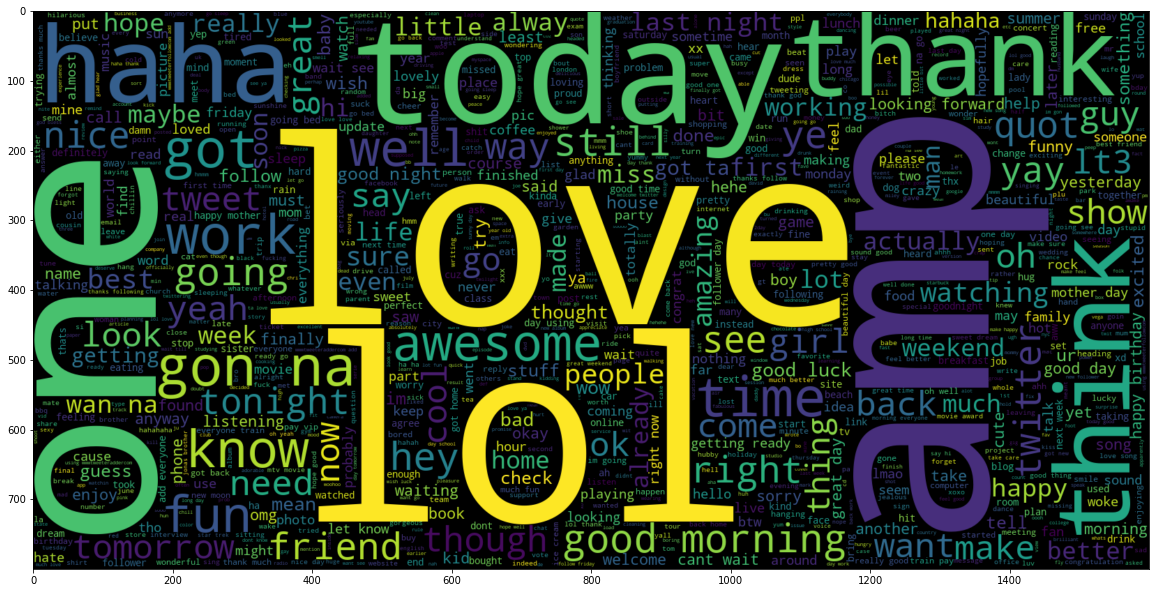

In [53]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].clean_tweet))
plt.imshow(wc , interpolation = 'bilinear')

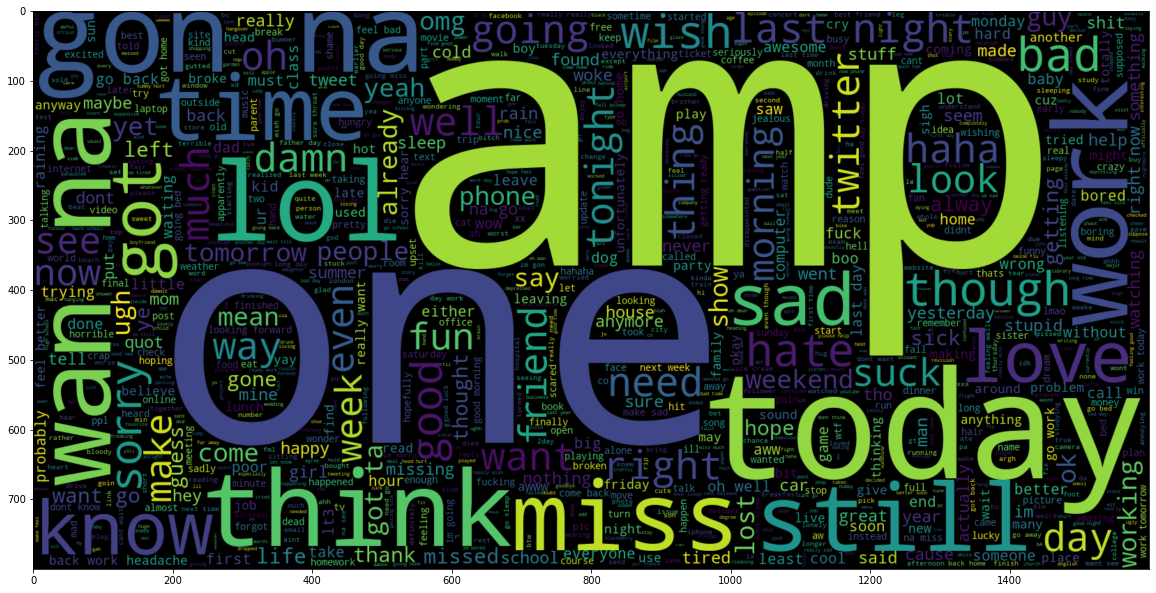

In [54]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].clean_tweet))
plt.imshow(wc , interpolation = 'bilinear')

# Sampling data

In [55]:
data = df.sample(1600000)

In [56]:
data

,sentiment,clean_tweet
1314929,Positive,hmmmworking home today garden laptop coffee su...
911368,Positive,happy birthday u happy birthday u happy birthd...
540251,Negative,nooooo sowwy lem me make babe
1092109,Positive,good morning way
1275468,Positive,long day something enjoy good day enjoy
...,...,...
109867,Negative,come x
315818,Negative,hmmmbrr raining here actually jealous miss rain
927279,Positive,watched latest gg episode fell inlove wish cou...
74357,Negative,though may supposed bring flower shower hate rain


In [57]:
# re-indexing dataframe 
data.reset_index(inplace=True, drop=True)

In [60]:
data

,sentiment,clean_tweet
0,Positive,hmmmworking home today garden laptop coffee su...
1,Positive,happy birthday u happy birthday u happy birthd...
2,Negative,nooooo sowwy lem me make babe
3,Positive,good morning way
4,Positive,long day something enjoy good day enjoy
...,...,...
1599995,Negative,come x
1599996,Negative,hmmmbrr raining here actually jealous miss rain
1599997,Positive,watched latest gg episode fell inlove wish cou...
1599998,Negative,though may supposed bring flower shower hate rain


# Train-Test Splitting

In [121]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

`train_test_split` will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [122]:
train_data, test_data = train_test_split(data, test_size=1-TRAIN_SIZE, random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [123]:
train_data

,sentiment,clean_tweet
23786,Positive,debby ryan way met mickey dolenz hsm3 premiere...
182699,Positive,agreed love shopping 2nd hand store book found...
476661,Positive,v going break girl heart 15 year sure
1181490,Positive,awesome weather ready rock festival summer rui...
878773,Positive,hahah guess depends much is ready loot
...,...,...
839891,Negative,naked brother band movie part 2 fair
535030,Negative,awaiting second back operation happy roll june
573977,Positive,tiimee bed xoxo
1238212,Positive,hope fun birthday party please follow chat


In [124]:
test_data

,sentiment,clean_tweet
709290,Negative,tired daughter awake 4am really think gone bed...
654075,Negative,email number one
728623,Positive,see you
697650,Positive,too delightfully thoughtful you
1244425,Positive,package go test got coded sorted day hopefully...
...,...,...
1242702,Positive,new music jukebox yay bit 80 isa bit disneyand...
206655,Positive,yeaah umm that come tomorrow
1065583,Negative,nope find video kstew dropping award damn infr...
846910,Positive,yeaaaaa magic got


# Tokenization


`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

In [126]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.clean_tweet)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 347011


Now we got a `tokenizer` object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from `pad_sequence` to do our job. It will make all the sequence in one constant length `MAX_SEQUENCE_LENGTH`.

In [128]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.clean_tweet), maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.clean_tweet), maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [129]:
labels = train_data.sentiment.unique().tolist()

### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [131]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


# Word embedding using GloVe

In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it. 

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification. If you want to learn more about the Word Embedding, please refer some links that I left at the end of this notebook.


In this notebook, I use **GloVe Embedding from Stanford AI** which can be found [here](https://nlp.stanford.edu/projects/glove/)

In [64]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-09-27 18:35:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-27 18:35:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-27 18:35:26--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [67]:
!ls

 EEDProject.ipynb
 glove.6B.100d.txt
 glove.6B.200d.txt
 glove.6B.300d.txt
 glove.6B.50d.txt
 glove.6B.zip
'Literature Review papers'
"Madan sir's inputs.gdoc"
'Progress report-2: Data Preprocessing and Cleaning.gdoc'
'Progress Report-3.gdoc'
'Project Abstract.gdoc'
 sentiment140dataset.csv
'Week1 Progress Report: Literature Review Survey.gdoc'


In [68]:
GLOVE_EMB = '/content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
# MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [70]:
embeddings_index = {}

import numpy as np

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [132]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [133]:
embedding_matrix.shape

(347011, 300)

In [134]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

# Model Training: CNN + Bidirectional LSTM

In [135]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [136]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

### Optimization Algorithm
This notebook uses Adam, optimization algorithm for Gradient Descent. You can learn more about Adam [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

### Callbacks
Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

- **LRScheduler** - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

- **ModelCheckPoint** - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [137]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1, min_lr = 0.01, monitor = 'val_loss', verbose = 1)

In [138]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 1403s 1s/step - loss: 0.5232 - accuracy: 0.7361 - val_loss: 0.4840 - val_accuracy: 0.7634
Epoch 2/10
1250/1250 [==============================] - 1400s 1s/step - loss: 0.4911 - accuracy: 0.7601 - val_loss: 0.4732 - val_accuracy: 0.7712
Epoch 3/10
1250/1250 [==============================] - 1402s 1s/step - loss: 0.4810 - accuracy: 0.7671 - val_loss: 0.4680 - val_accuracy: 0.7742
Epoch 4/10
1250/1250 [==============================] - 1404s 1s/step - loss: 0.4744 - accuracy: 0.7708 - val_loss: 0.4655 - val_accuracy: 0.7766
Epoch 5/10
1250/1250 [==============================] - 1398s 1s/step - loss: 0.4697 - accuracy: 0.7738 - val_loss: 0.4654 - val_accuracy: 0.7776
Epoch 6/10
1250/1250 [==============================] - 1398s 1s/step - loss: 0.4666 - accuracy: 0.7757 - val_loss: 0.4627 - val_accuracy: 0.7787
Epoch 7/10
1250/1250 [==============================] - 1394s 1s/step - loss: 0.4637 - accuracy: 0.7778 - val_loss: 0.4593 -

## Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

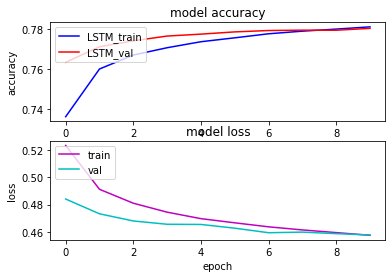

In [139]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [140]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 72s 2s/step


### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [141]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

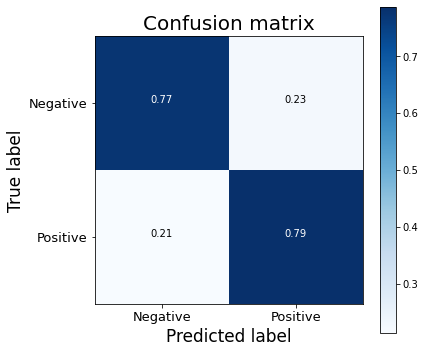

In [142]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

### Classification report

In [143]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.78      0.77      0.78    160170
    Positive       0.78      0.79      0.78    159830

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

